In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/.config/default_configs.db
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/logs/2024.11.06/14.23.02.977294.log
/content/.config/logs/2024.11.06/14.22.49.463793.log
/content/.config/logs/2024.11.06/14.23.15.846674.log
/content/.config/logs/2024.11.06/14.23.01.961464.log
/content/.config/logs/2024.11.06/14.22.28.082325.log
/content/.config/logs/2024.11.06/14.23.16.565928.log
/content/.config/configurations/config_default
/content/datasetOfMobile/user_behavior_dataset.csv
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [ ]:
df = pd.read_csv('/content/datasetOfMobile/user_behavior_dataset.csv')

In [ ]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
numeric_df = df.select_dtypes(include='number')

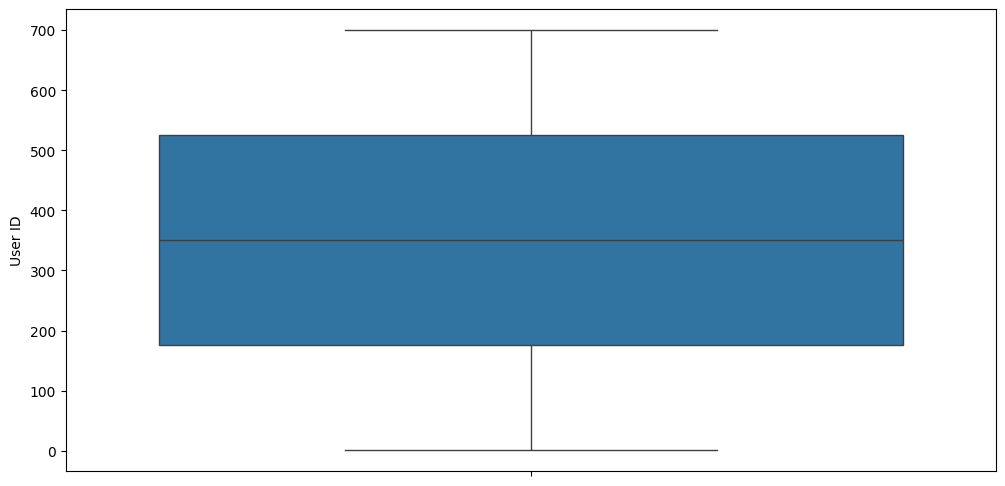

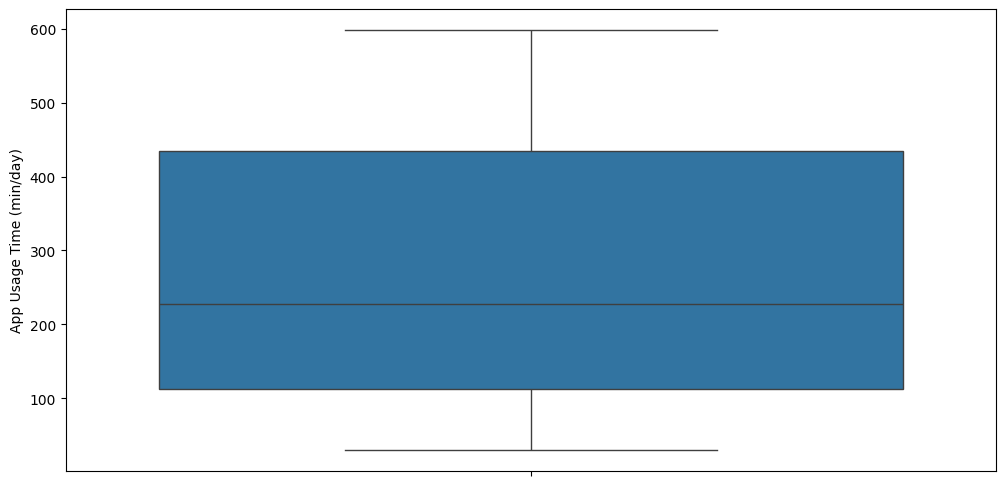

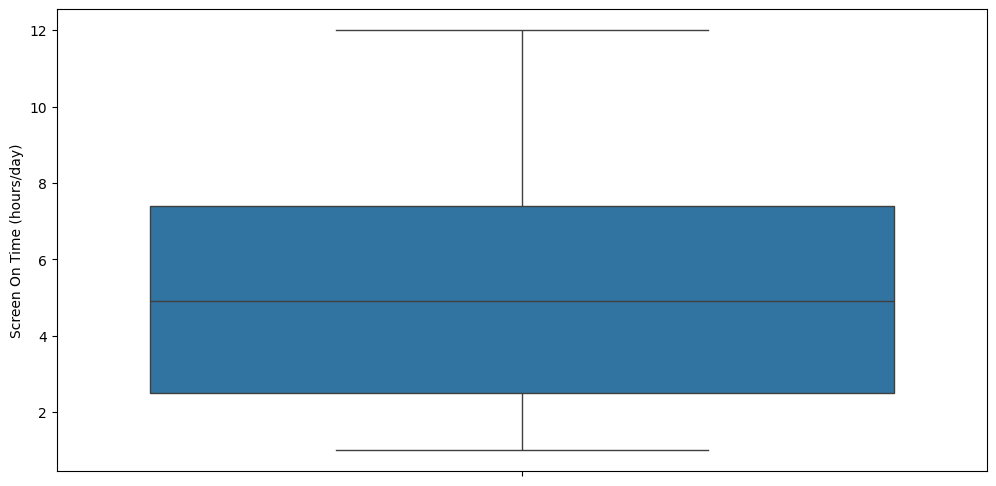

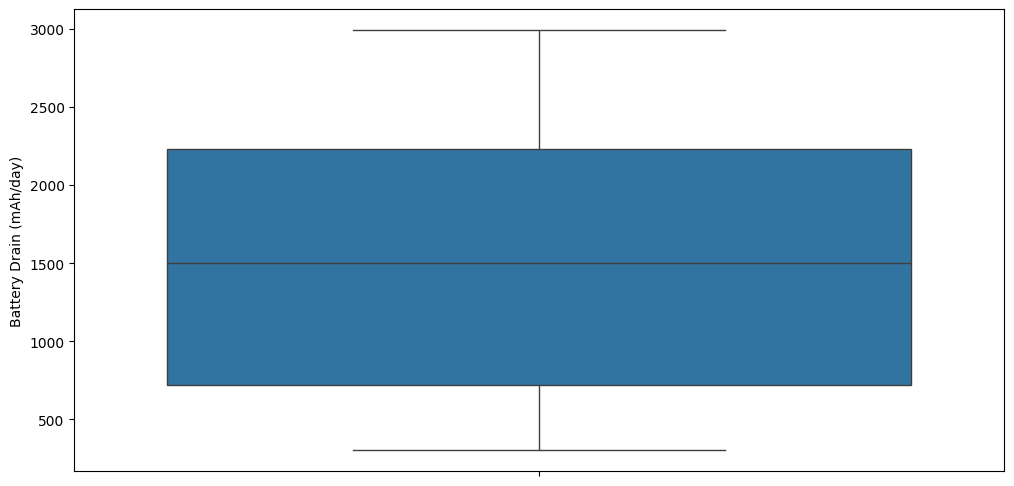

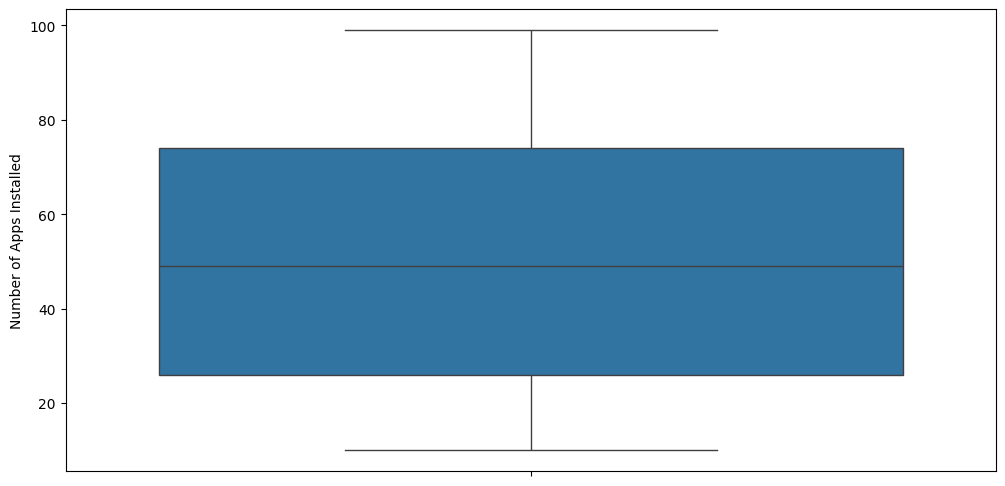

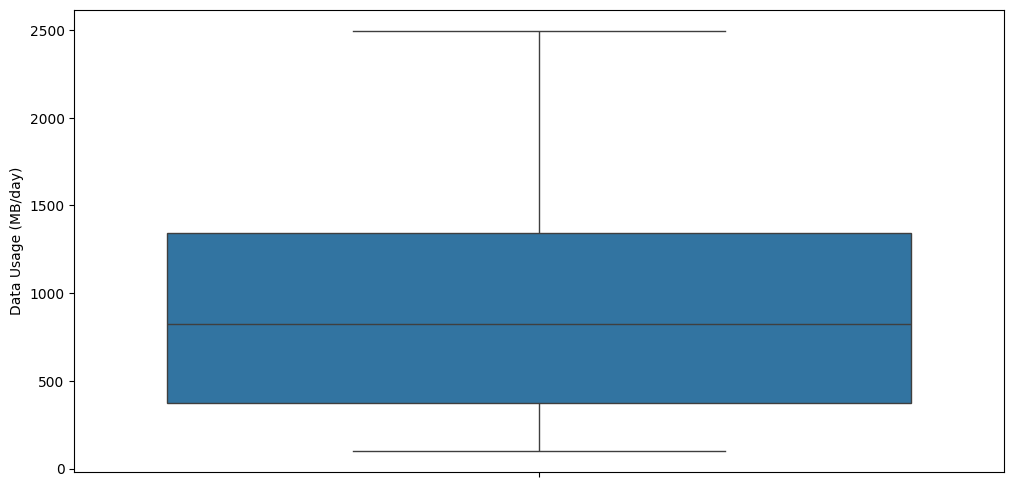

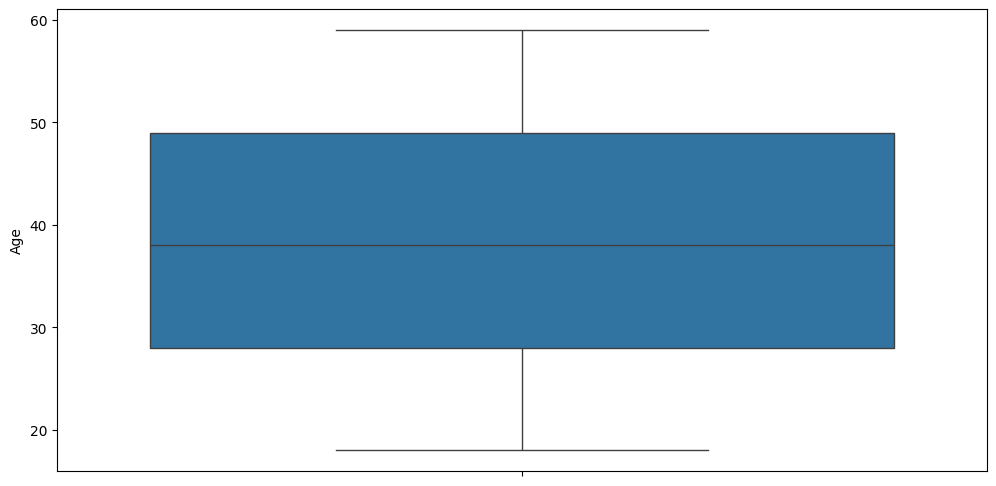

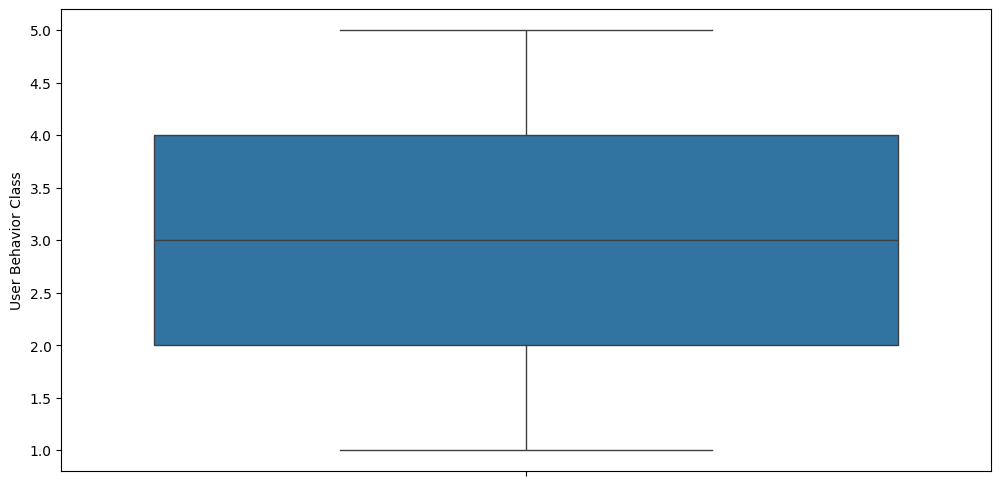

In [ ]:
for columns in numeric_df:
    plt.figure(figsize=(12,6))
    sns.boxplot(y=columns,data=numeric_df)
    plt.show()

## Device Model Vs. Gender

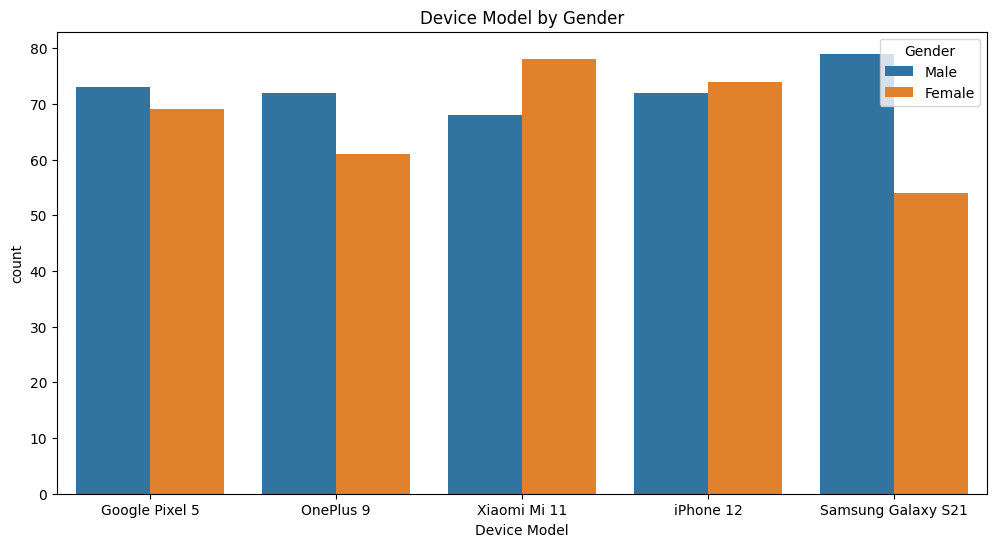

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(hue='Gender',x='Device Model',data=df)
plt.title('Device Model by Gender')
plt.show()

## Data Usage Vs. Gender

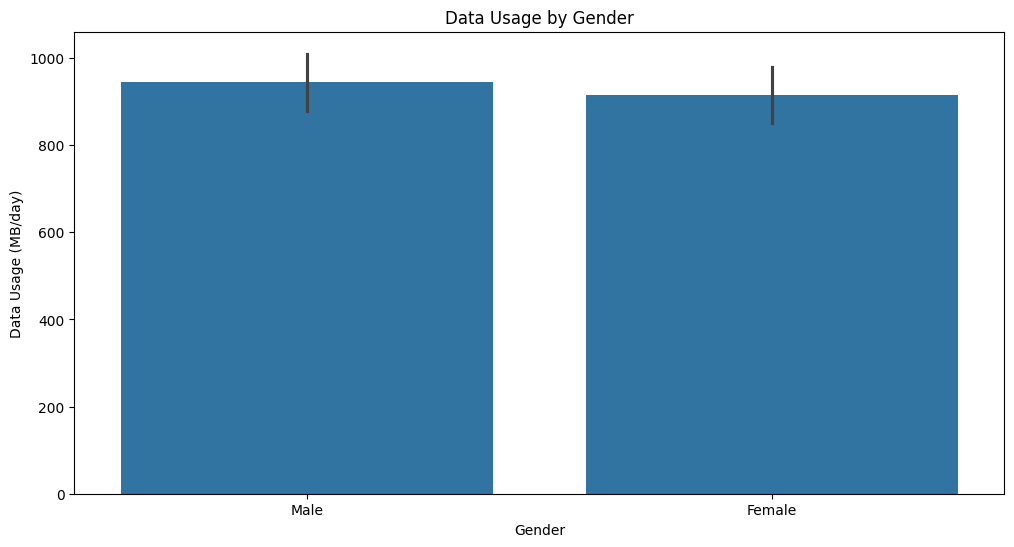

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Gender',y='Data Usage (MB/day)',data=df)
plt.title('Data Usage by Gender')
plt.show()

## Number of Apps installed Vs. Gender

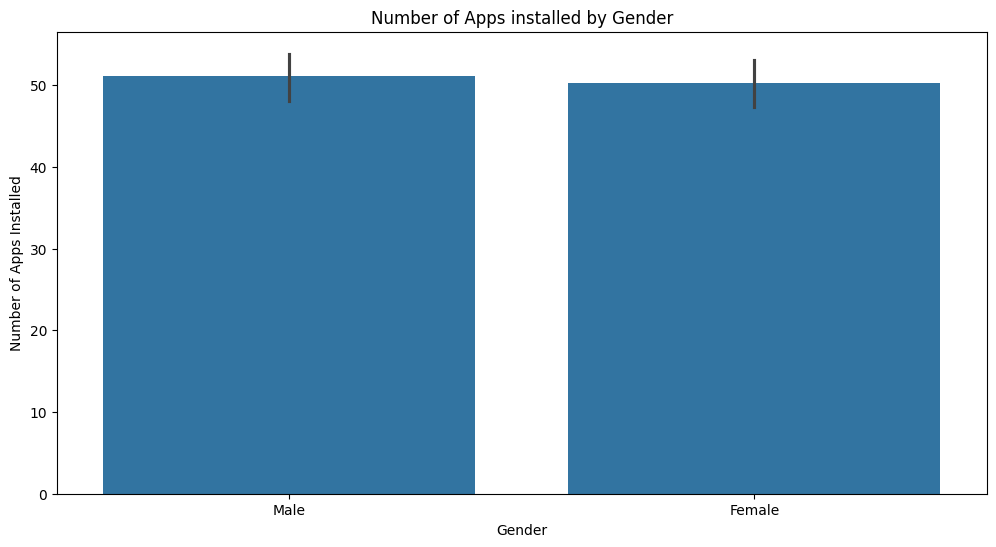

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Gender',y='Number of Apps Installed',data=df)
plt.title('Number of Apps installed by Gender')
plt.show()

## Screen On Time (hours/day)	Vs. Gender

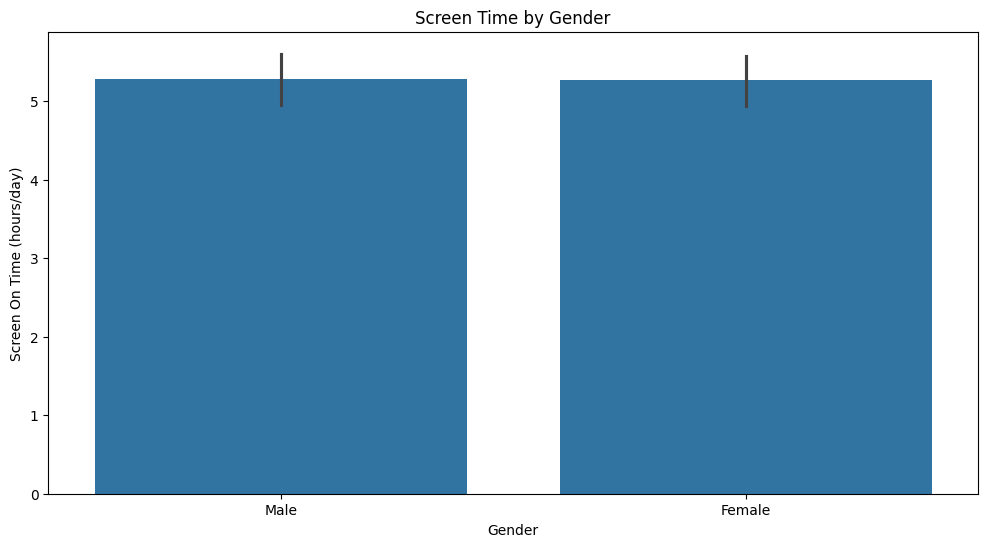

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Gender',y='Screen On Time (hours/day)',data=df)
plt.title('Screen Time by Gender')
plt.show()

## App Usage Time (min/day)	Vs. Gender

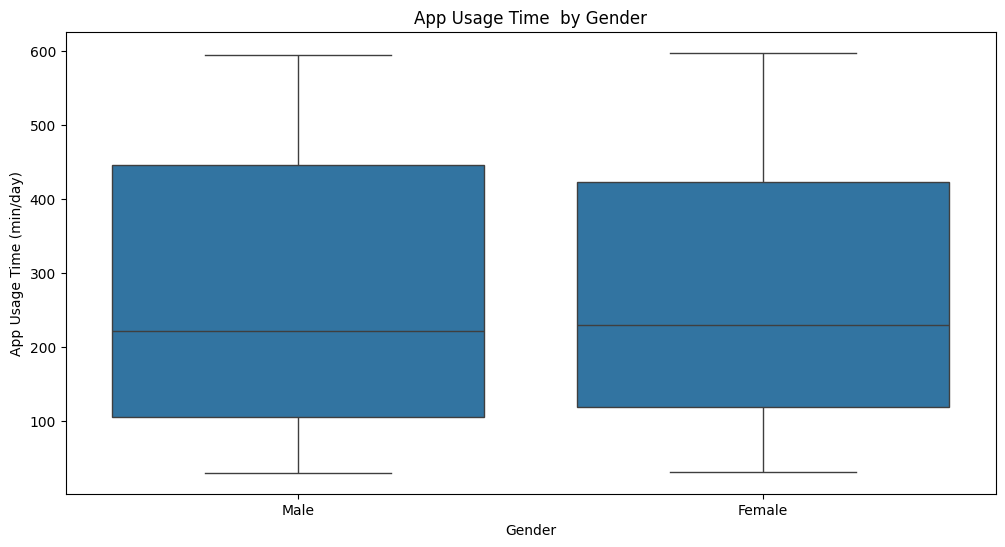

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Gender',y='App Usage Time (min/day)',data=df)
plt.title('App Usage Time  by Gender')
plt.show()

## Operating System	Vs. Gender

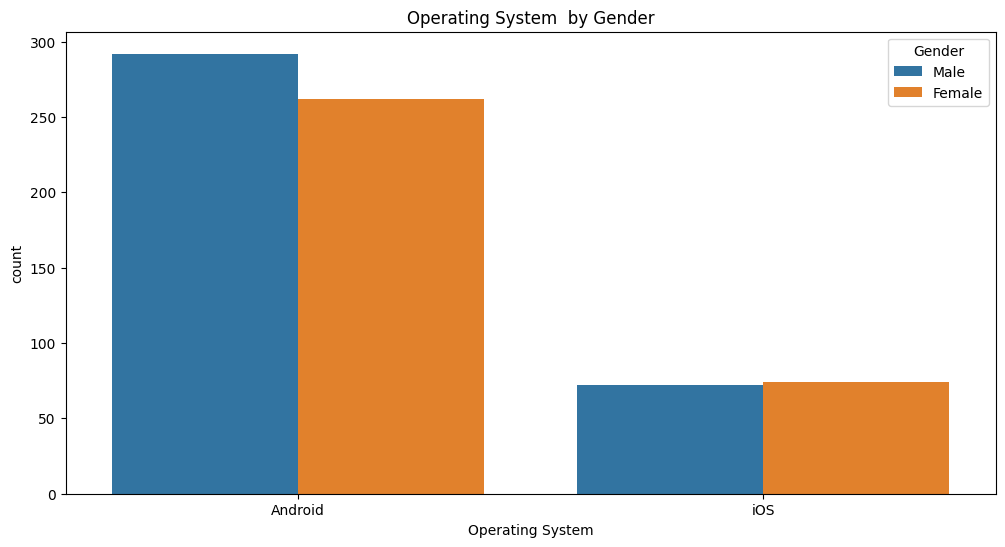

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(hue='Gender',x='Operating System',data=df)
plt.title('Operating System  by Gender')
plt.show()

## Screen On Time Vs. Age

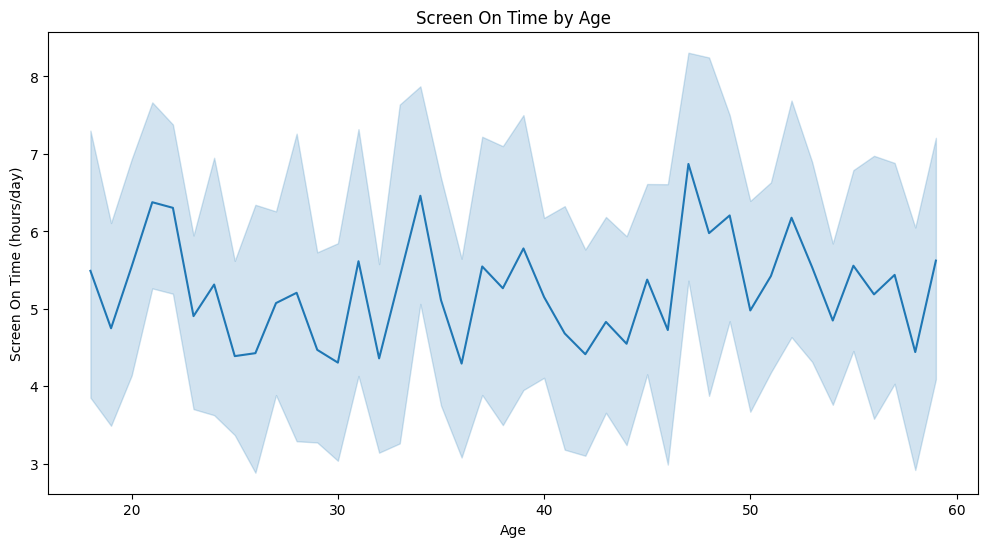

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Age',y='Screen On Time (hours/day)',data=df)
plt.title('Screen On Time by Age')
plt.show()

## App Usage Time Vs. Age

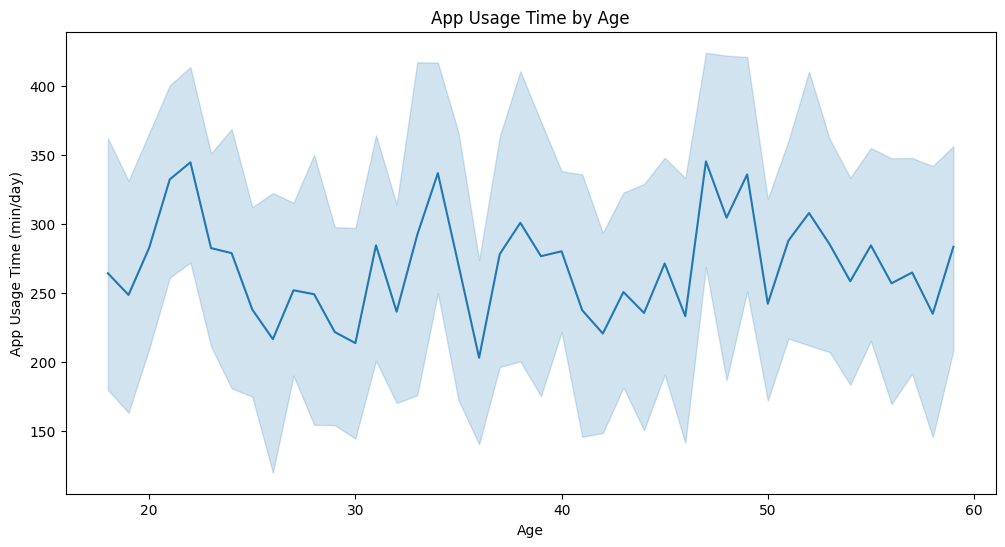

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Age',y='App Usage Time (min/day)',data=df)
plt.title('App Usage Time by Age')
plt.show()

In [ ]:
df = df.drop(columns = ["User ID"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 54.8+ KB


In [ ]:
df['Device Model'].value_counts()

,count
Device Model,
Xiaomi Mi 11,146
iPhone 12,146
Google Pixel 5,142
OnePlus 9,133
Samsung Galaxy S21,133


In [ ]:
changes = {
    'Xiaomi Mi 11' : 0,
    'iPhone 12' : 1,
    'Google Pixel 5' : 2,
    'OnePlus 9' : 3,
    'Samsung Galaxy S21' : 4
}

In [ ]:
df['Device Model'] = df['Device Model'].map(changes)

In [ ]:
df['Operating System'].value_counts()

,count
Operating System,
Android,554
iOS,146


In [ ]:
changes = {
    'Android' : 0,
    'iOS' : 1
}

In [ ]:
df['Operating System'] = df['Operating System'].map(changes)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,364
Female,336


In [ ]:
changes = {
    'Male' : 0,
    'Female' : 1
}

In [ ]:
df['Gender'] = df['Gender'].map(changes)

## Correlation

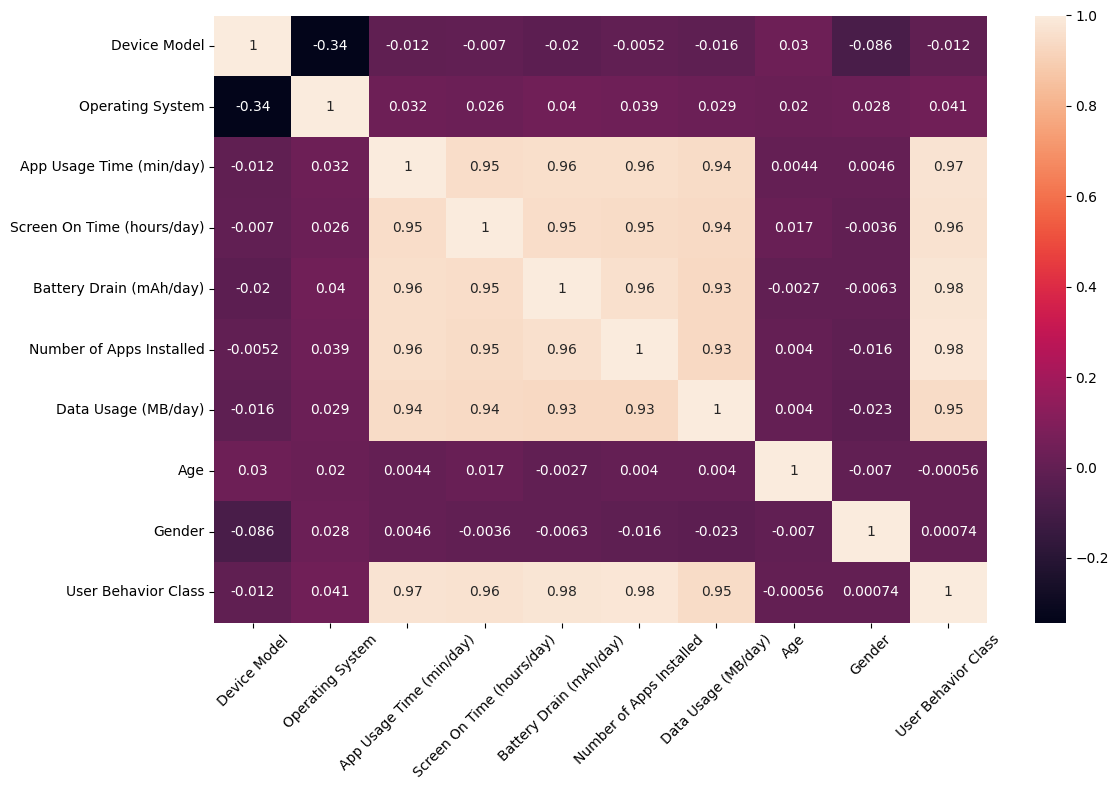

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),  annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

## Linear Regression

In [ ]:
Y = df['User Behavior Class']
X = df.drop(columns = 'User Behavior Class',axis=1)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y.values.reshape(-1,1))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle = True, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.9842456139062721

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_pred,Y_test)
print(f'R² Score: {r2 * 100:.2f}%')

R² Score: 98.64%


Duplicated rows: 0


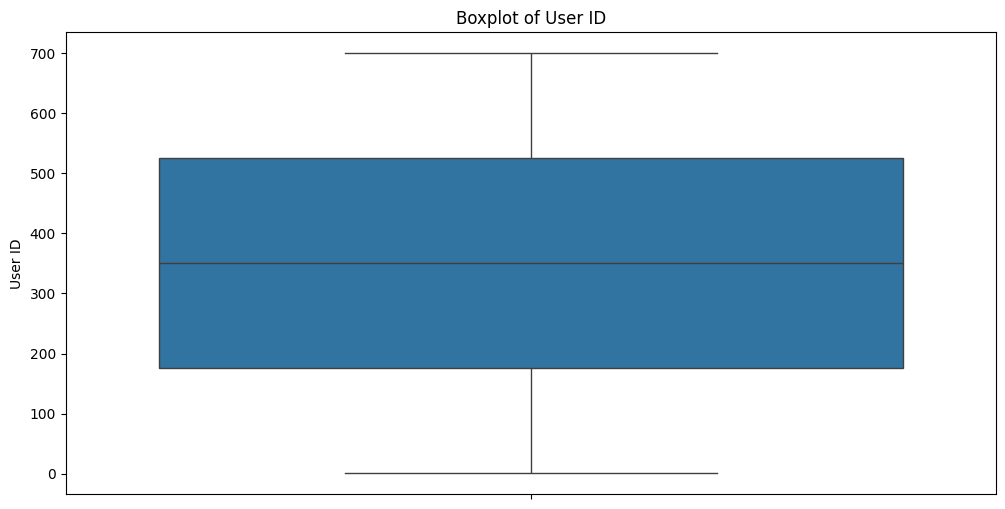

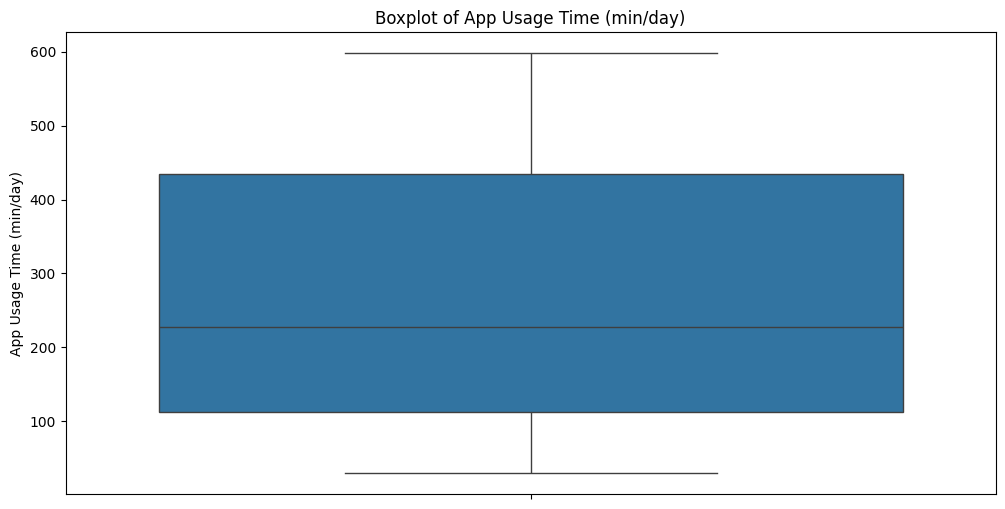

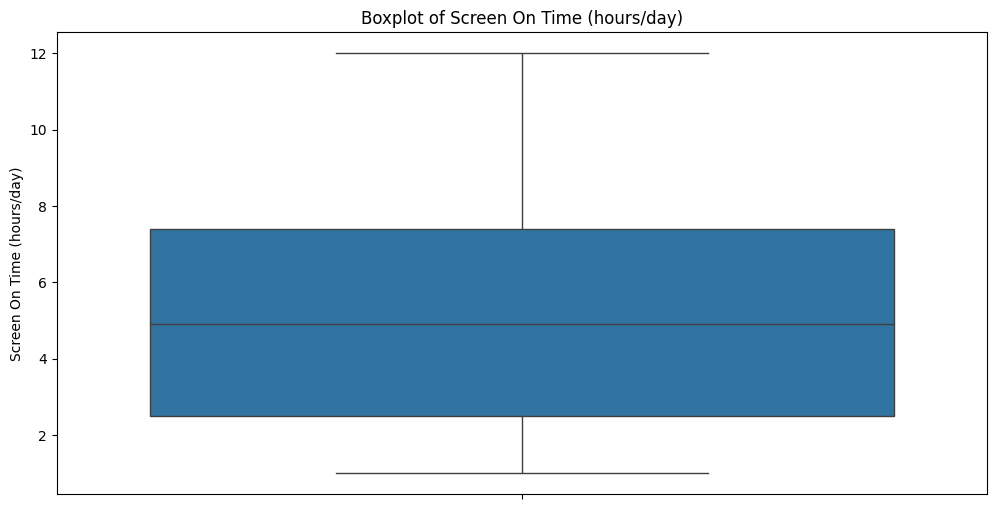

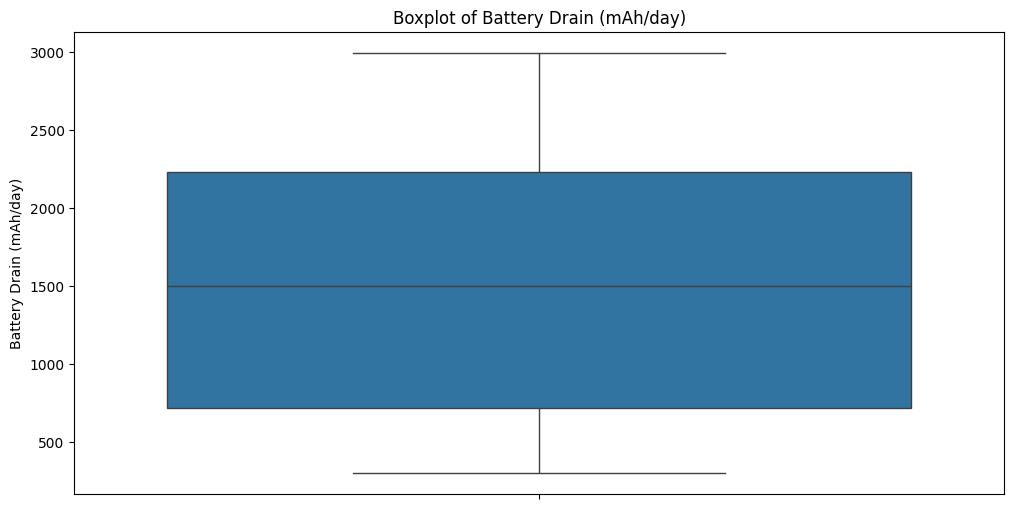

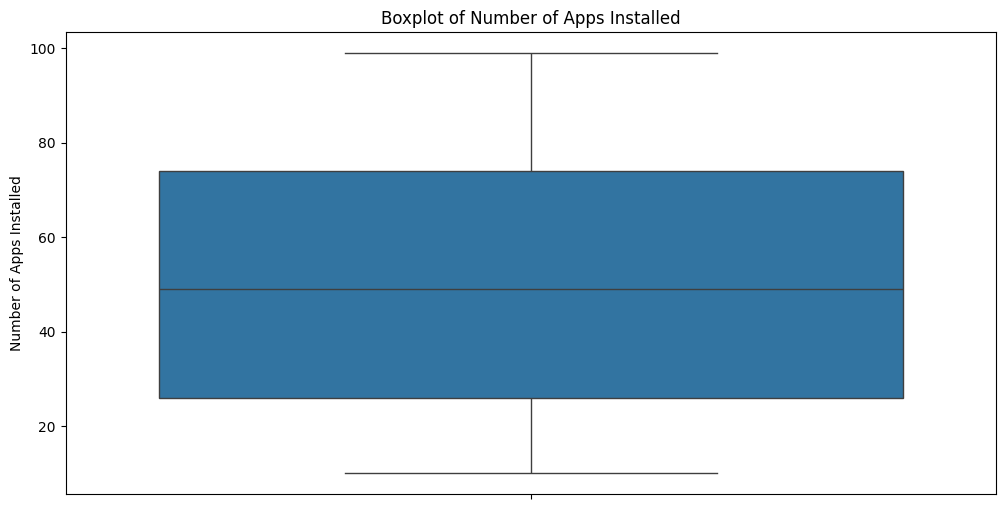

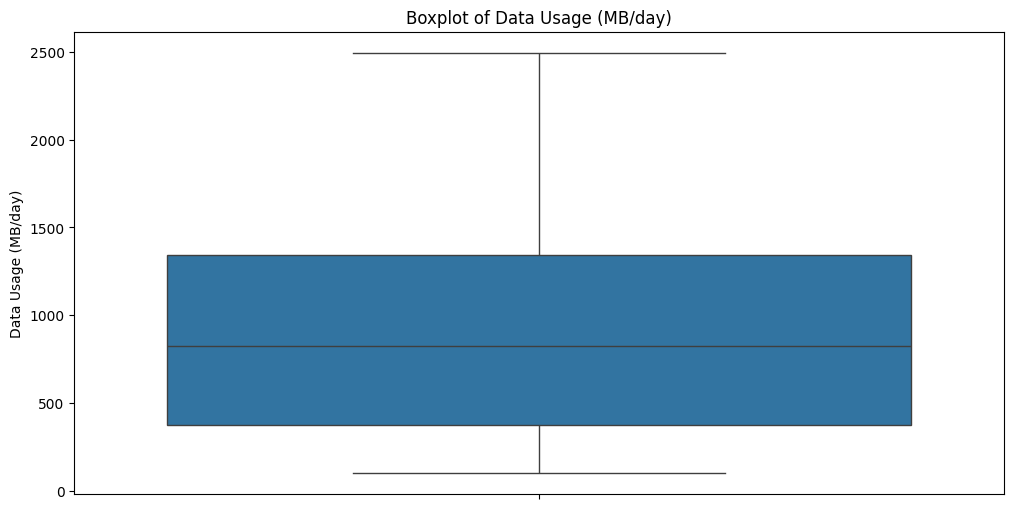

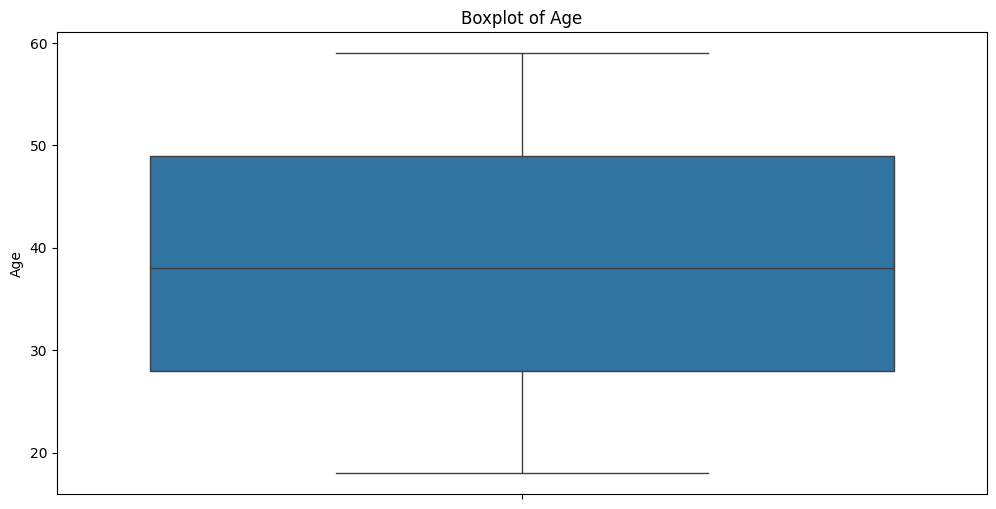

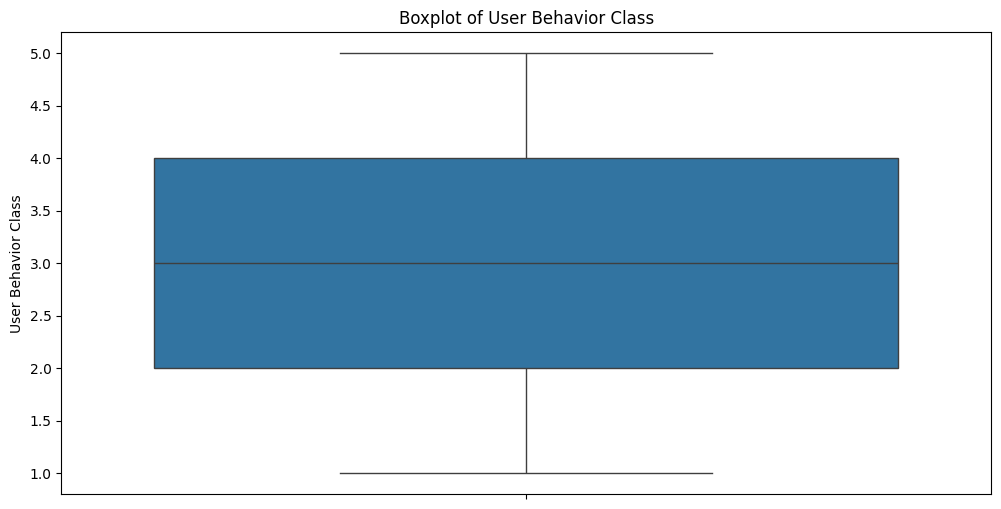

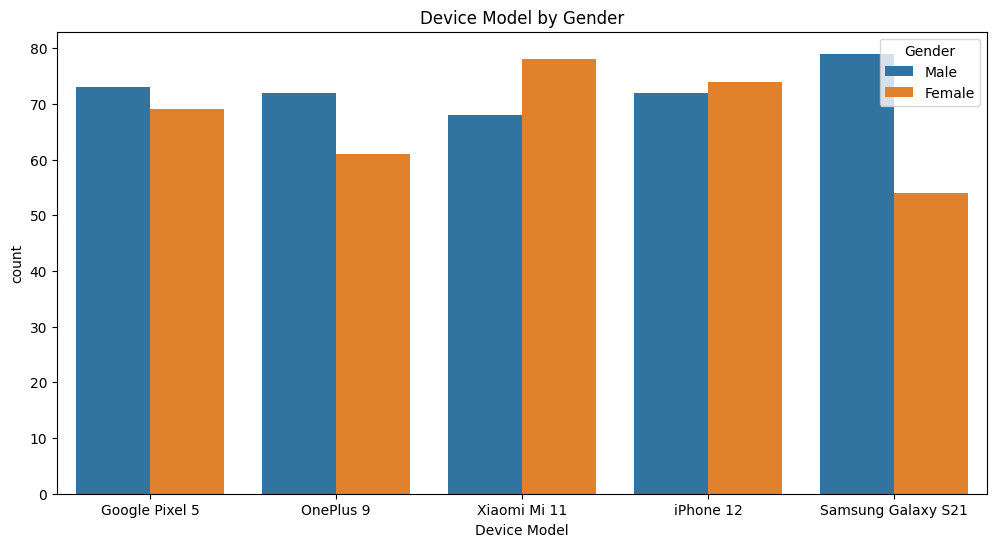

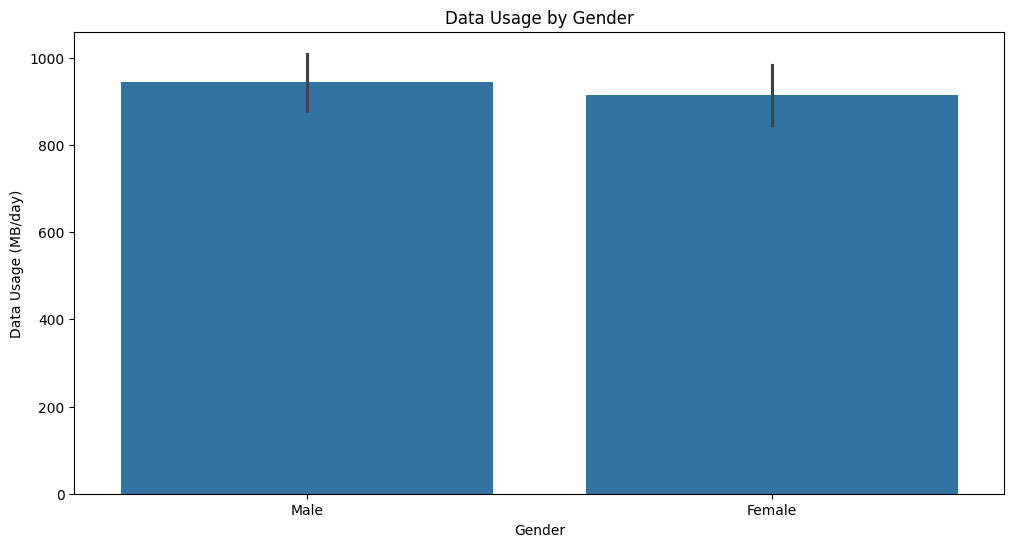

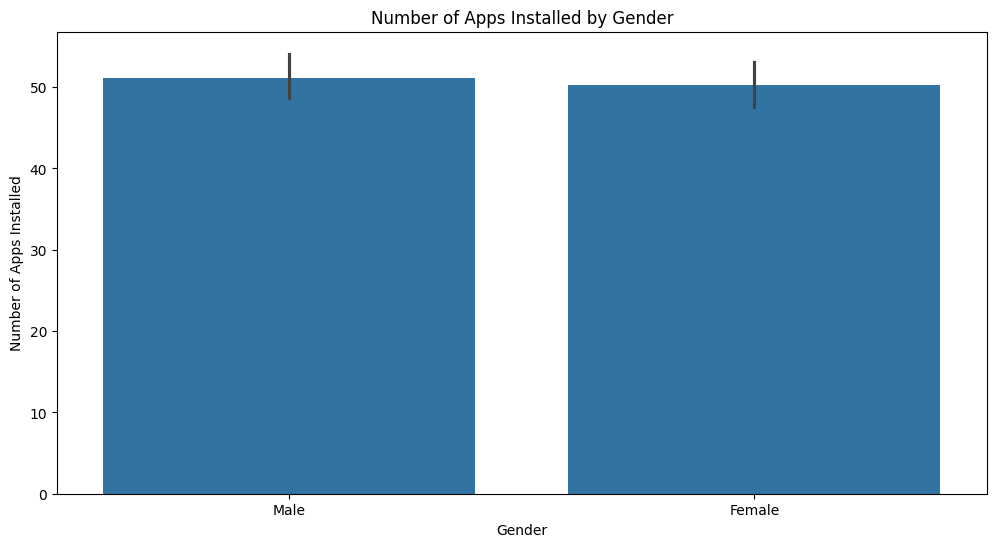

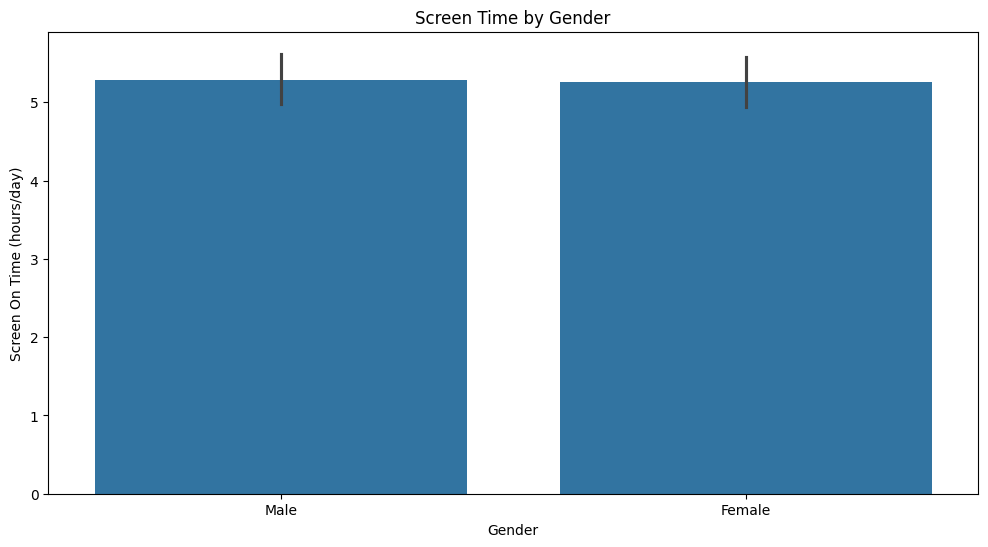

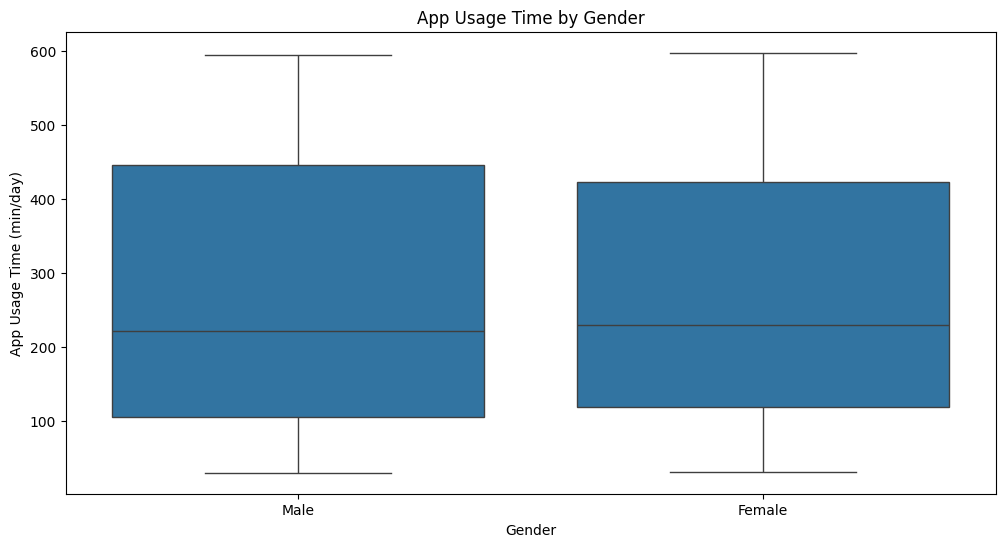

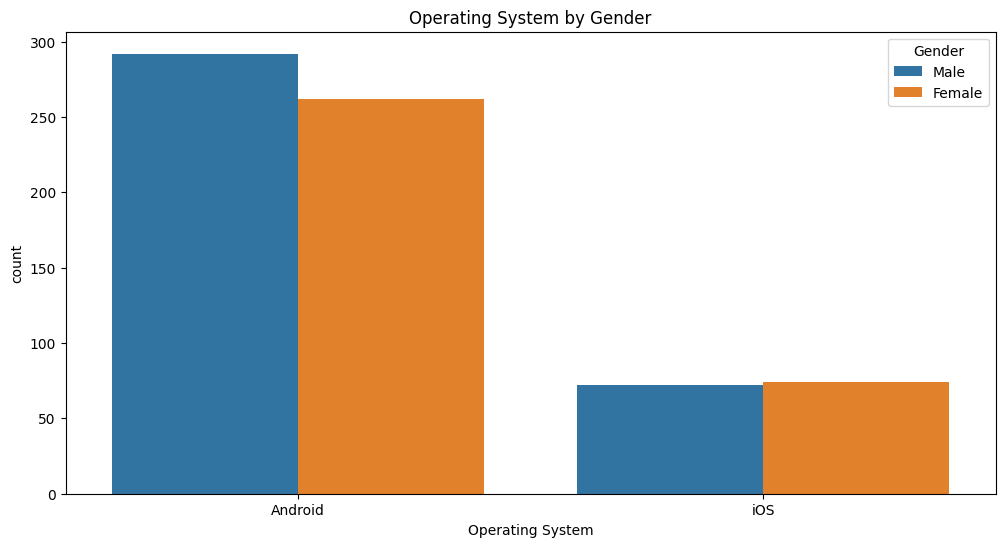

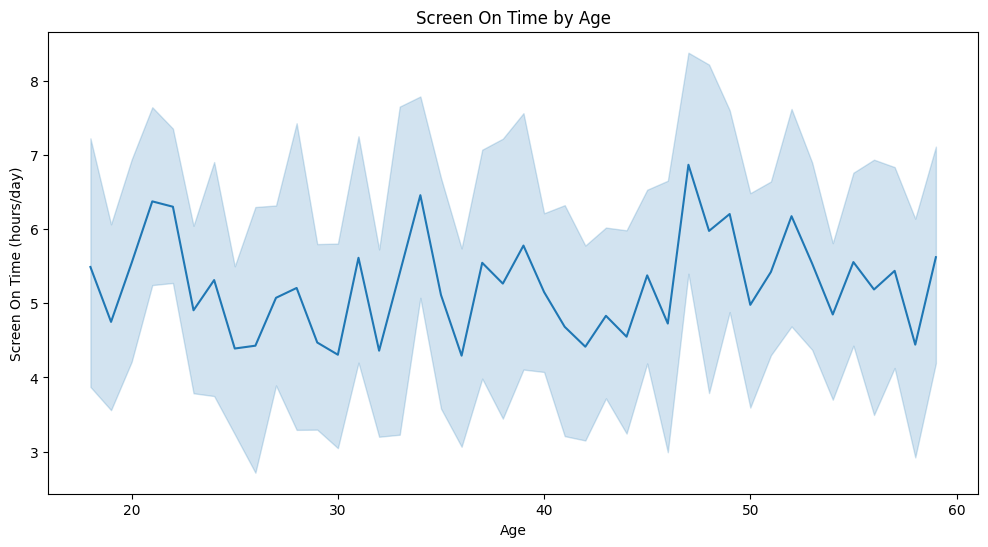

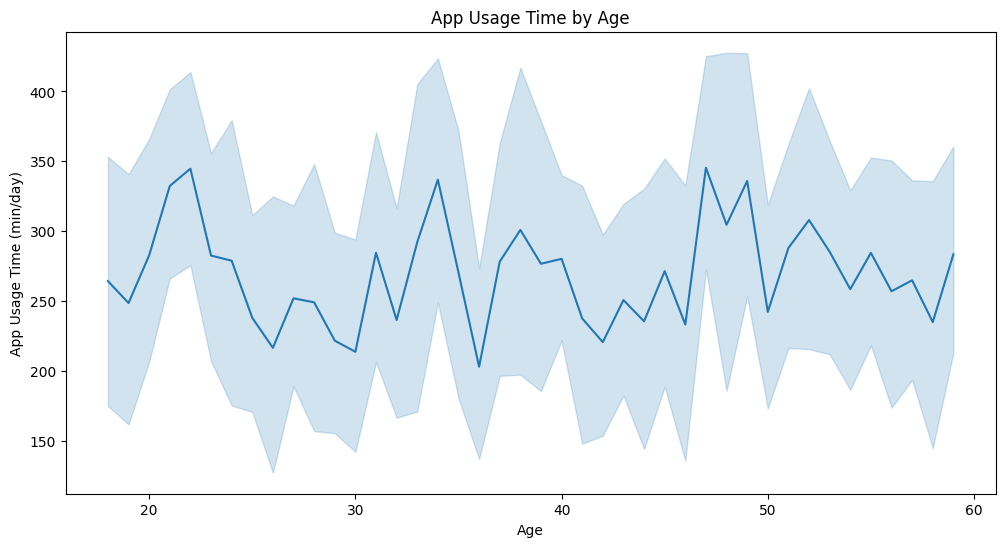

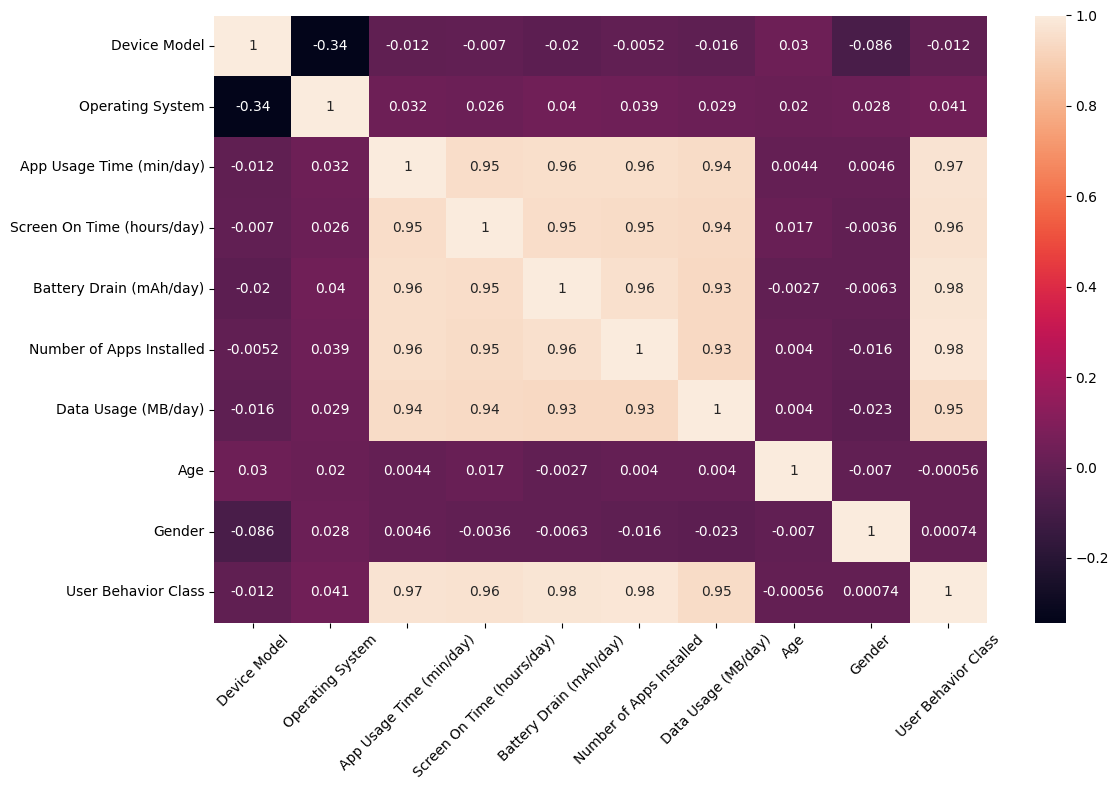

Linear Regression: R² Score: 98.73%, MSE: 0.03
Logistic Regression: Accuracy: 98.57%
Decision Tree: Accuracy: 100.00%
Random Forest: Accuracy: 100.00%
K-Nearest Neighbors: Accuracy: 95.71%
Support Vector Machine: Accuracy: 100.00%
XGBoost Classifier: Accuracy: 100.00%


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/content/datasetOfMobile/user_behavior_dataset.csv')

# Checking for duplicates
print(f"Duplicated rows: {df.duplicated().sum()}")

# Plotting boxplots for numeric columns
numeric_df = df.select_dtypes(include='number')
for column in numeric_df:
    plt.figure(figsize=(12, 6))
    sns.boxplot(y=column, data=numeric_df)
    plt.title(f'Boxplot of {column}')
    plt.show()

# Visualizing categorical data
plt.figure(figsize=(12, 6))
sns.countplot(hue='Gender', x='Device Model', data=df)
plt.title('Device Model by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Data Usage (MB/day)', data=df)
plt.title('Data Usage by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Number of Apps Installed', data=df)
plt.title('Number of Apps Installed by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Screen On Time (hours/day)', data=df)
plt.title('Screen Time by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='App Usage Time (min/day)', data=df)
plt.title('App Usage Time by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(hue='Gender', x='Operating System', data=df)
plt.title('Operating System by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Screen On Time (hours/day)', data=df)
plt.title('Screen On Time by Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='App Usage Time (min/day)', data=df)
plt.title('App Usage Time by Age')
plt.show()

# Preprocessing
df = df.drop(columns=["User ID"])
df['Device Model'] = df['Device Model'].map({
    'Xiaomi Mi 11': 0,
    'iPhone 12': 1,
    'Google Pixel 5': 2,
    'OnePlus 9': 3,
    'Samsung Galaxy S21': 4
})
df['Operating System'] = df['Operating System'].map({'Android': 0, 'iOS': 1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Adjust class labels in Y to start from 0
df['User Behavior Class'] = df['User Behavior Class'] - 1

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Splitting the data into X and Y
Y = df['User Behavior Class']
X = df.drop(columns='User Behavior Class', axis=1)

# Scaling the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True, random_state=42)

# Defining models
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost Classifier": XGBClassifier()
}

# Training and evaluating each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    if model_name == "Linear Regression":
        # Use R² score and MSE for regression model
        r2 = r2_score(Y_test, Y_pred)
        mse = mean_squared_error(Y_test, Y_pred)
        results[model_name] = f"R² Score: {r2 * 100:.2f}%, MSE: {mse:.2f}"
    else:
        # Use accuracy for classification models
        accuracy = accuracy_score(Y_test, Y_pred)
        results[model_name] = f"Accuracy: {accuracy * 100:.2f}%"

# Displaying results
for model_name, result in results.items():
    print(f"{model_name}: {result}")


Duplicated rows: 0


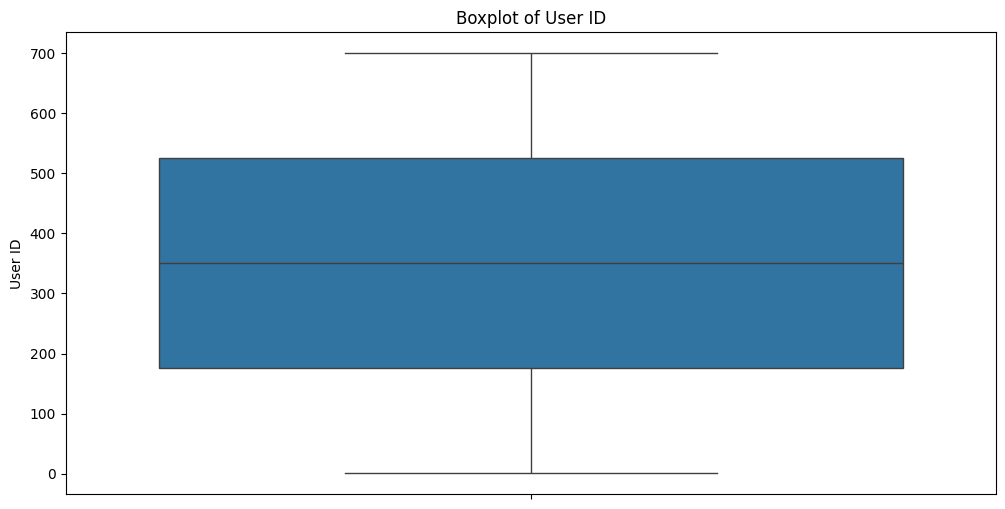

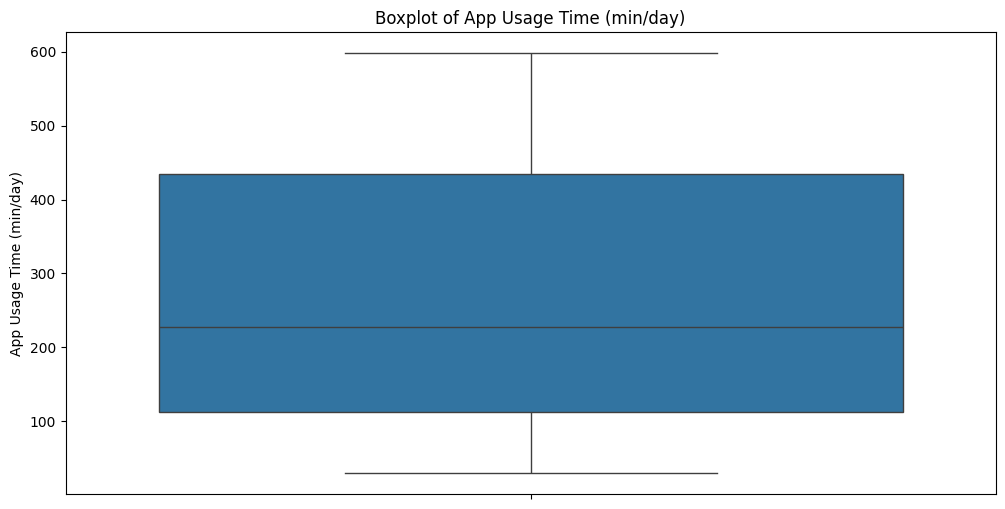

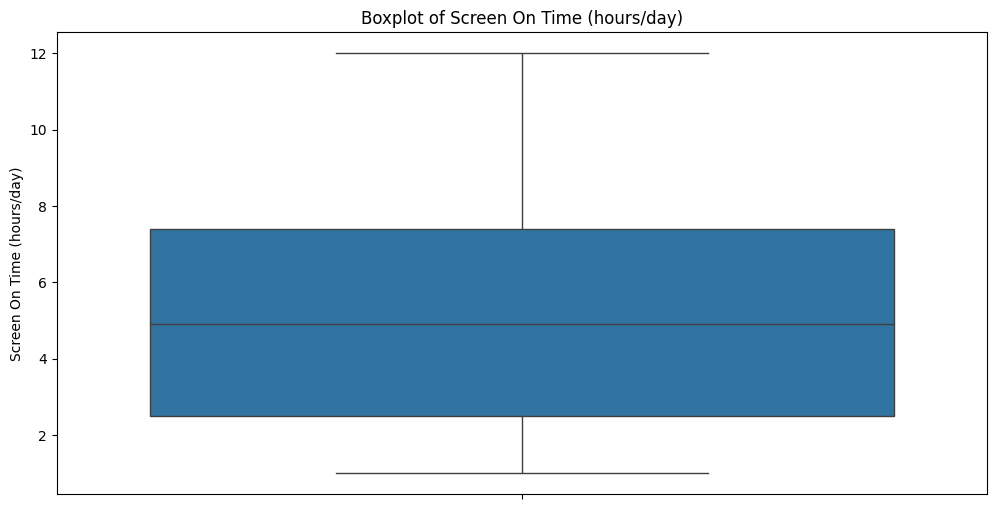

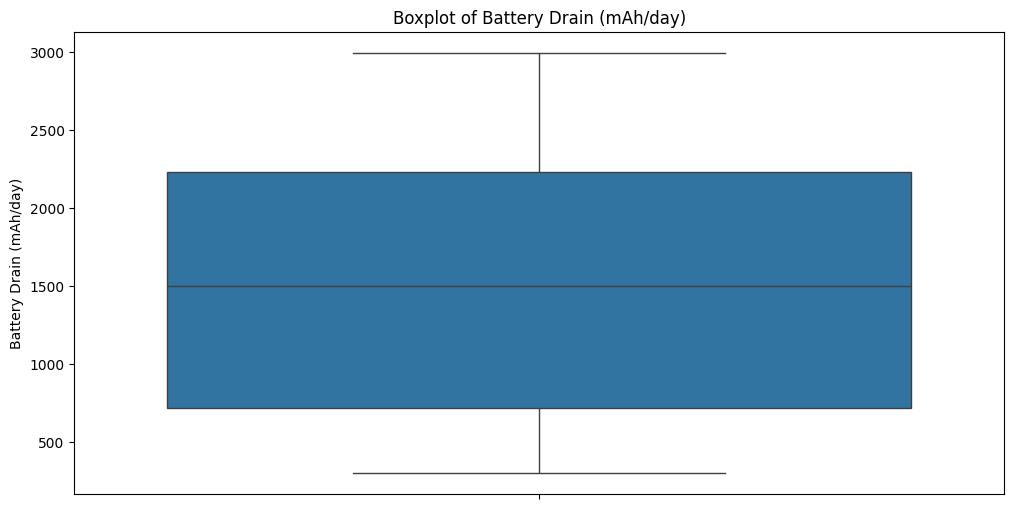

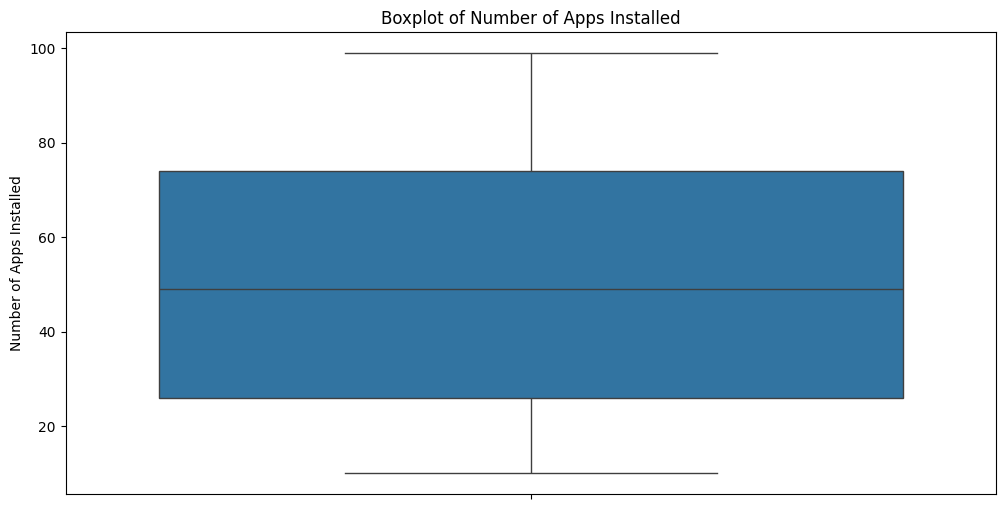

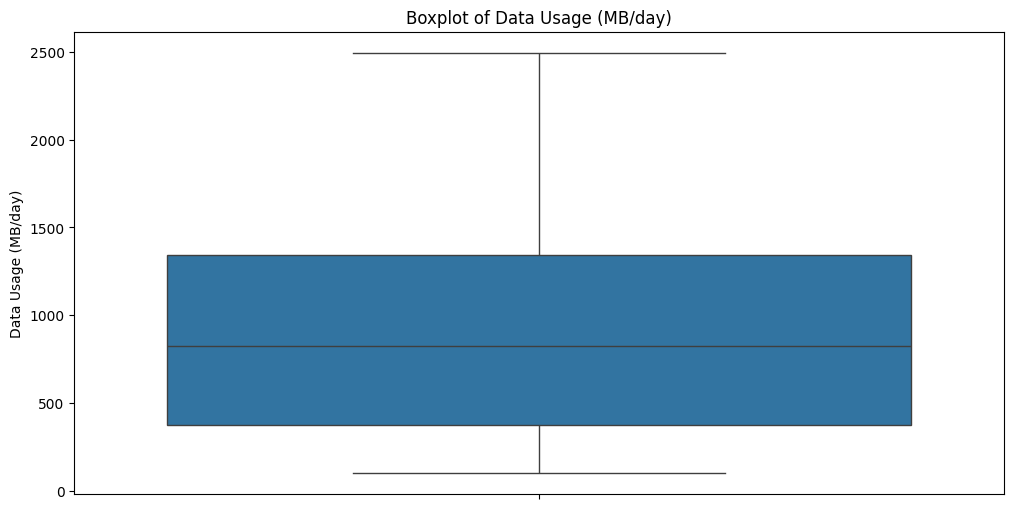

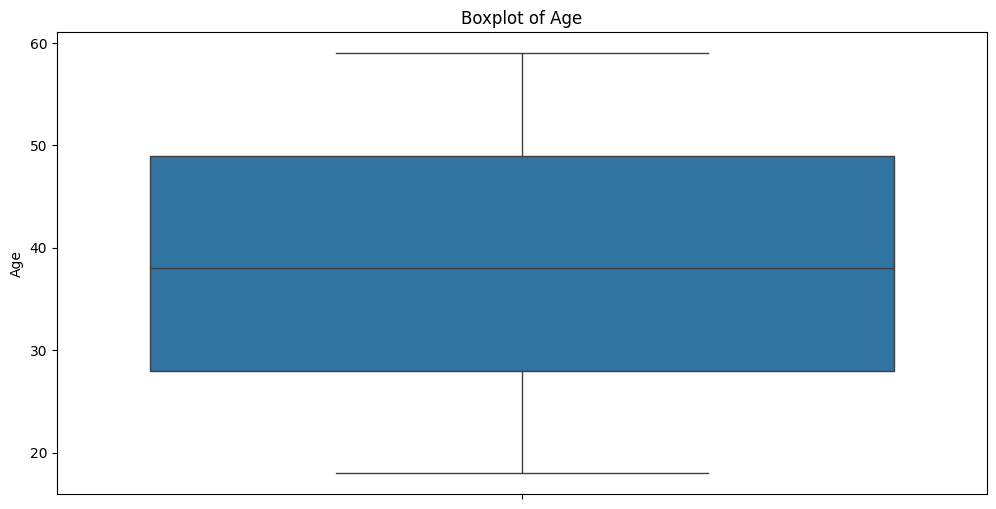

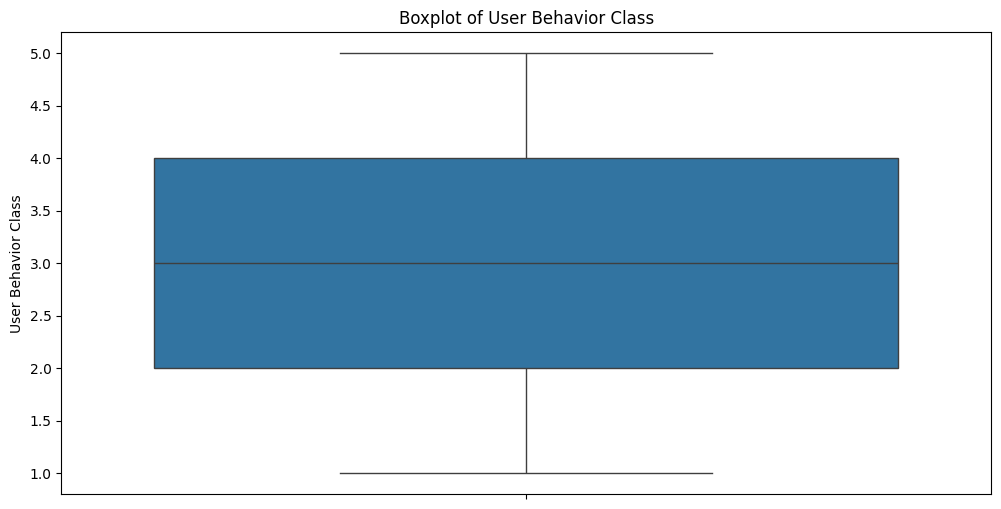

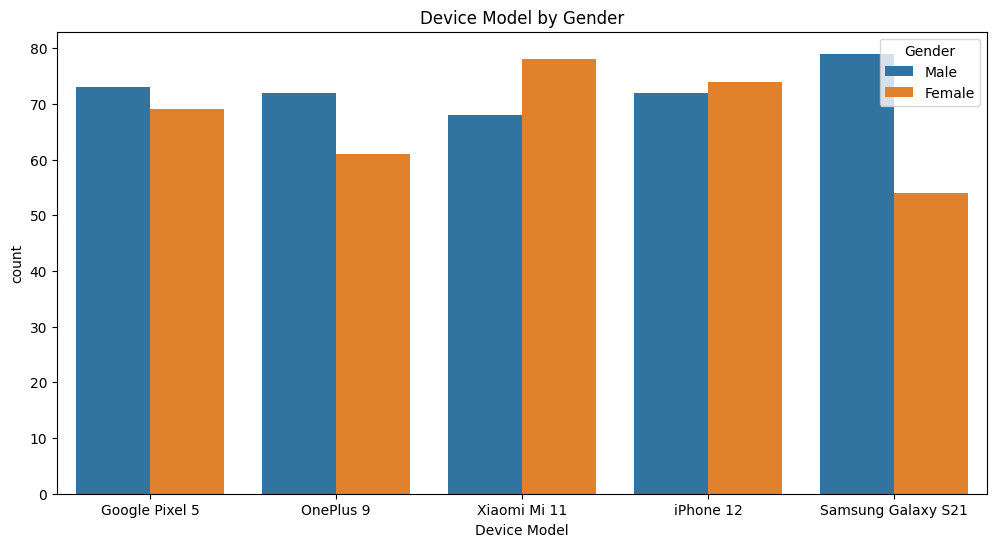

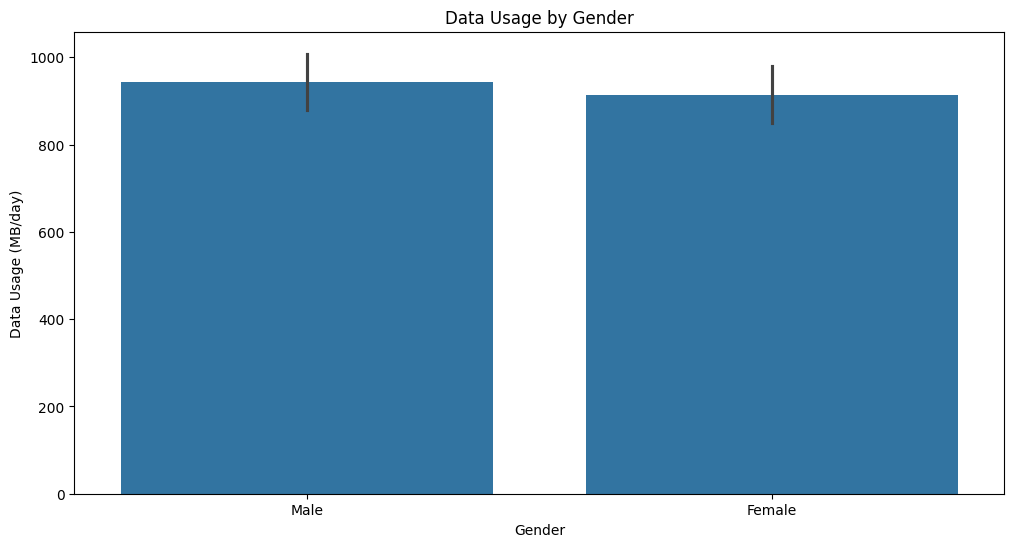

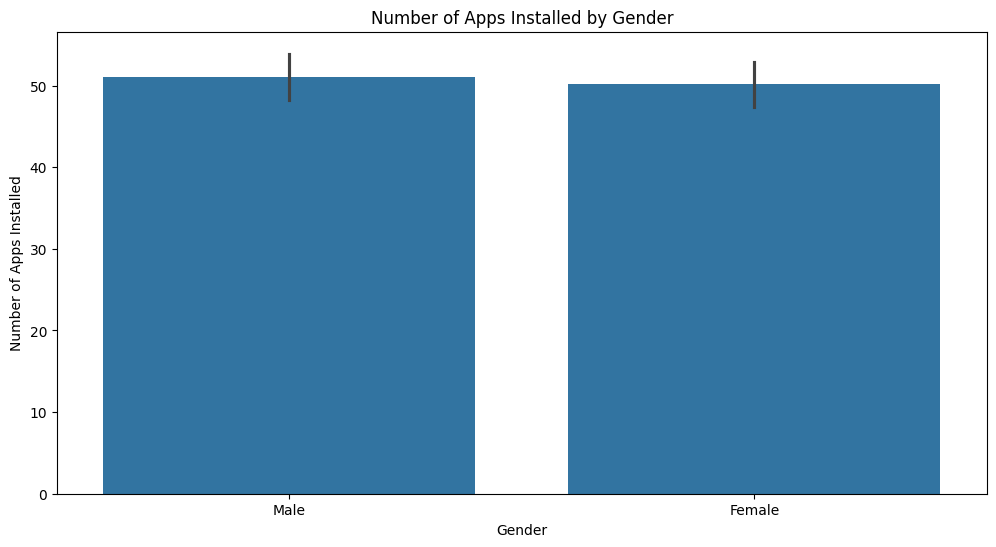

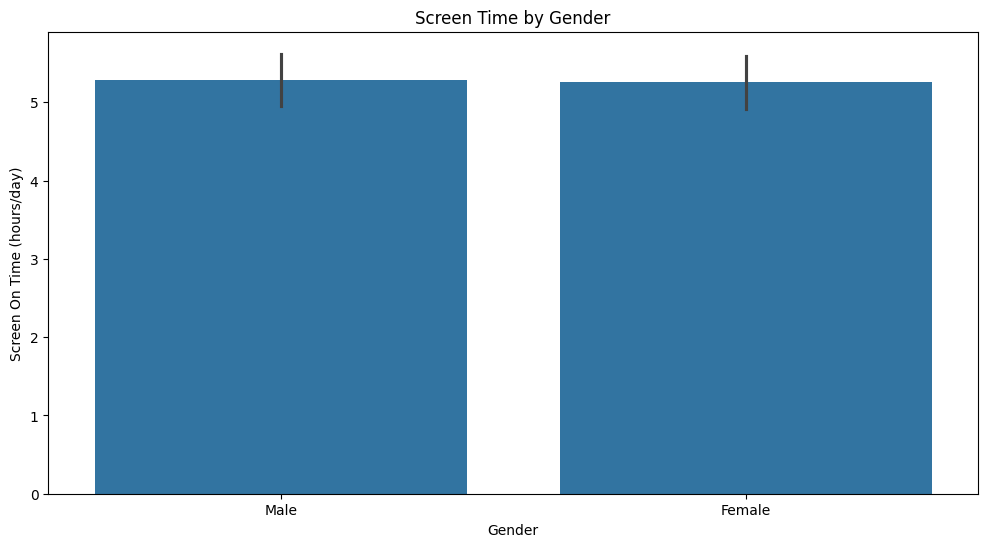

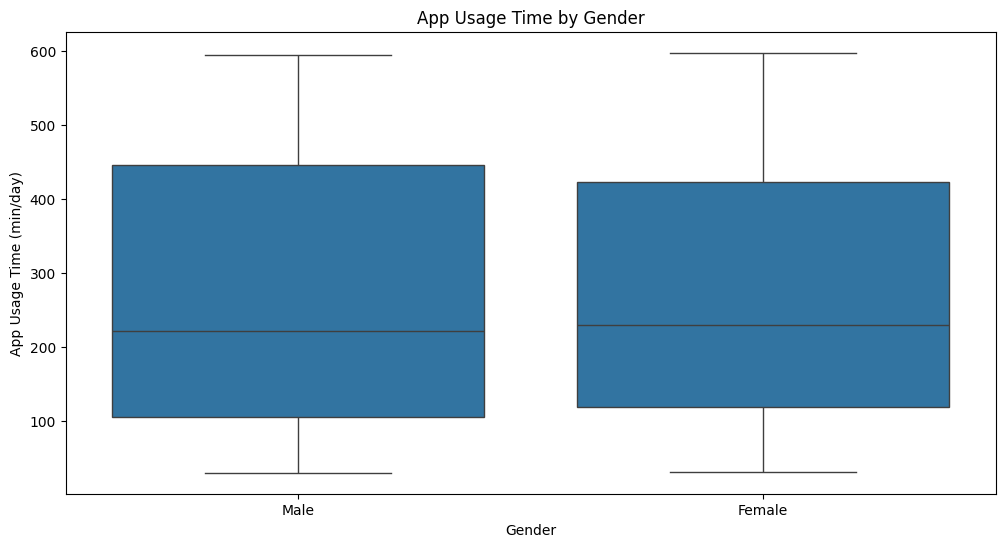

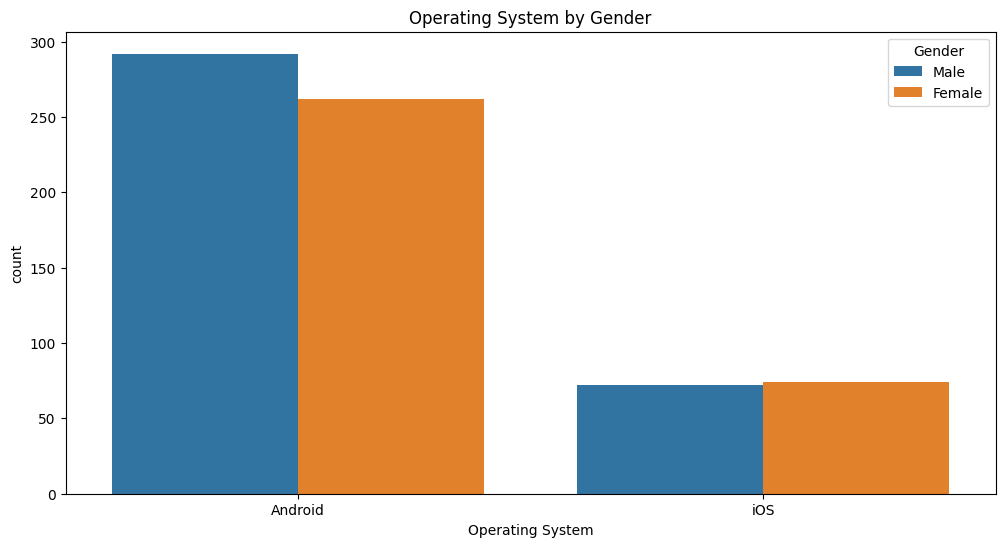

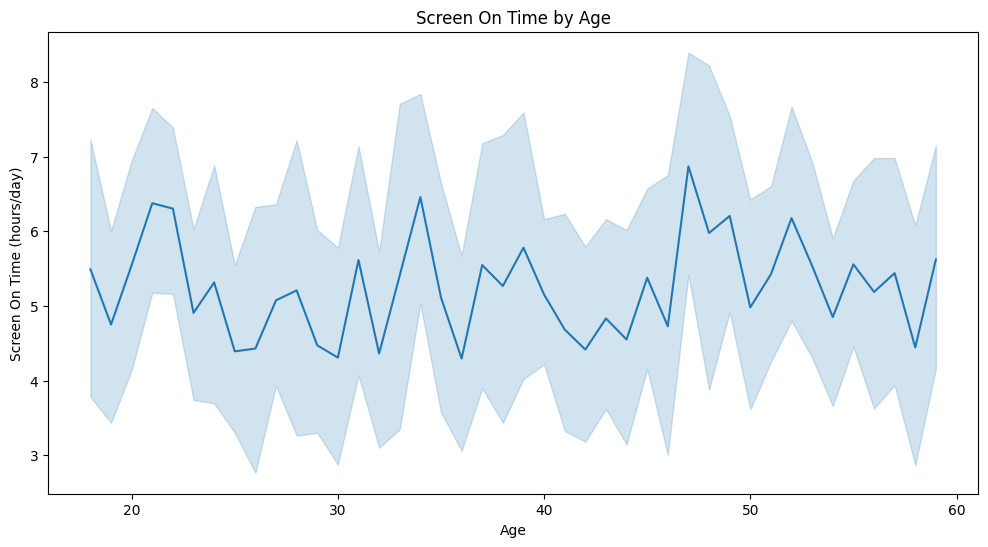

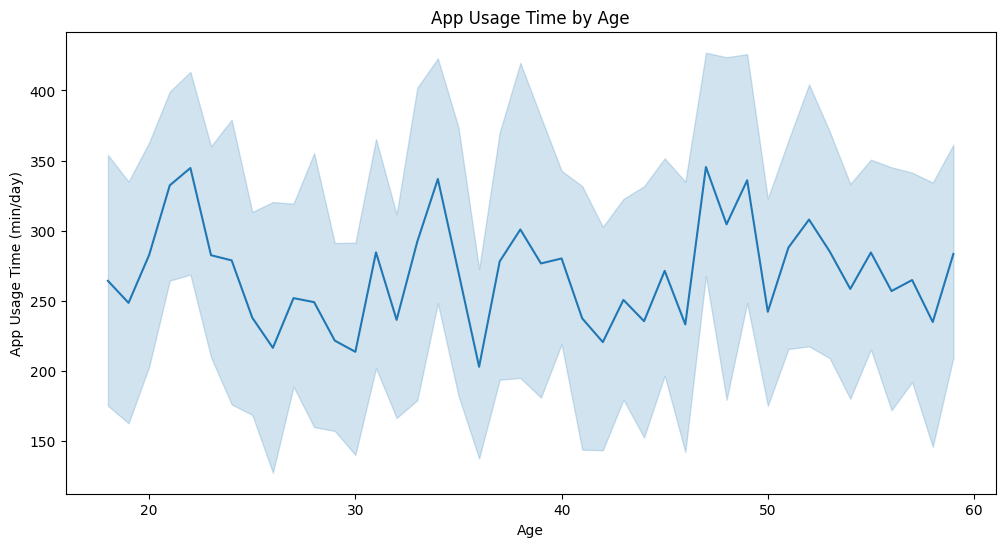

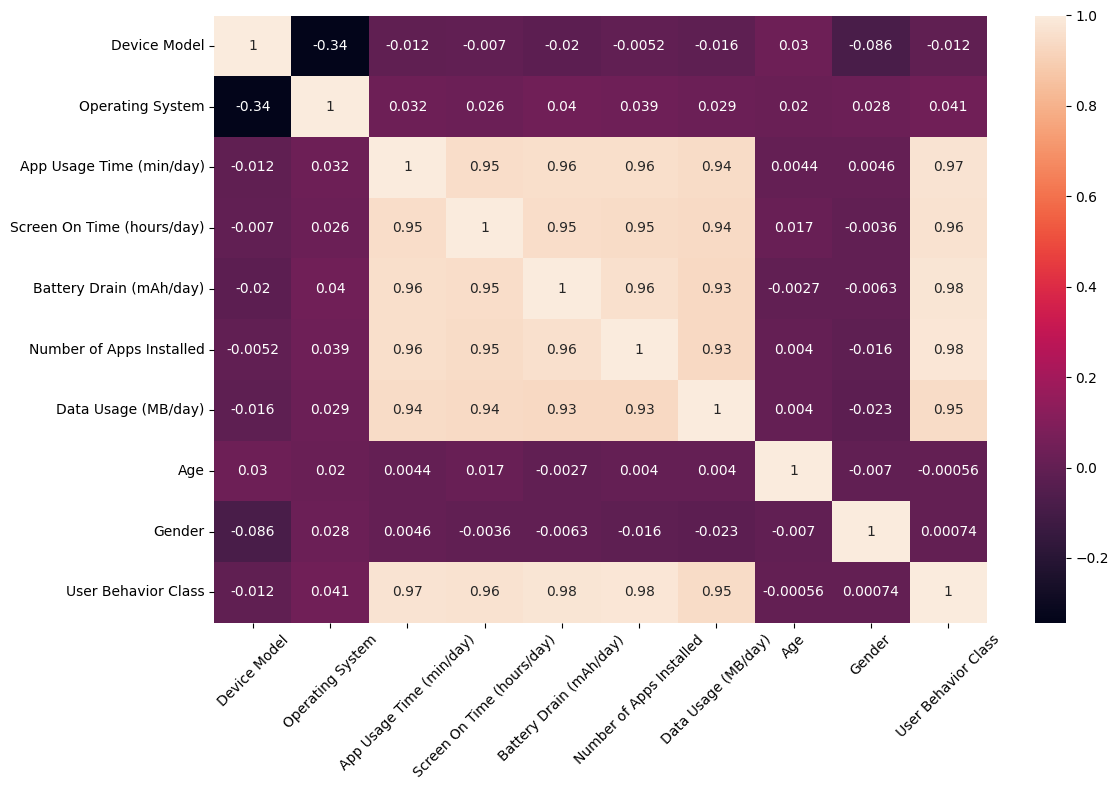

Linear Regression: R² Score (CV Avg): 98.40%, MSE (CV Avg): 0.03
Logistic Regression: Accuracy (CV Avg): 99.14%
Decision Tree: Accuracy (CV Avg): 99.86%
Random Forest: Accuracy (CV Avg): 100.00%
K-Nearest Neighbors: Accuracy (CV Avg): 98.86%
Support Vector Machine: Accuracy (CV Avg): 100.00%
XGBoost Classifier: Accuracy (CV Avg): 99.14%


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/content/datasetOfMobile/user_behavior_dataset.csv')

# Checking for duplicates
print(f"Duplicated rows: {df.duplicated().sum()}")

# Plotting boxplots for numeric columns
numeric_df = df.select_dtypes(include='number')
for column in numeric_df:
    plt.figure(figsize=(12, 6))
    sns.boxplot(y=column, data=numeric_df)
    plt.title(f'Boxplot of {column}')
    plt.show()

# Visualizing categorical data
plt.figure(figsize=(12, 6))
sns.countplot(hue='Gender', x='Device Model', data=df)
plt.title('Device Model by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Data Usage (MB/day)', data=df)
plt.title('Data Usage by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Number of Apps Installed', data=df)
plt.title('Number of Apps Installed by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Screen On Time (hours/day)', data=df)
plt.title('Screen Time by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='App Usage Time (min/day)', data=df)
plt.title('App Usage Time by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(hue='Gender', x='Operating System', data=df)
plt.title('Operating System by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Screen On Time (hours/day)', data=df)
plt.title('Screen On Time by Age')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='App Usage Time (min/day)', data=df)
plt.title('App Usage Time by Age')
plt.show()

# Preprocessing
df = df.drop(columns=["User ID"])
df['Device Model'] = df['Device Model'].map({
    'Xiaomi Mi 11': 0,
    'iPhone 12': 1,
    'Google Pixel 5': 2,
    'OnePlus 9': 3,
    'Samsung Galaxy S21': 4
})
df['Operating System'] = df['Operating System'].map({'Android': 0, 'iOS': 1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Adjust class labels in Y to start from 0
df['User Behavior Class'] = df['User Behavior Class'] - 1

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Splitting the data into X and Y
Y = df['User Behavior Class']
X = df.drop(columns='User Behavior Class', axis=1)

# Scaling the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Defining models
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost Classifier": XGBClassifier()
}

# Applying cross-validation and evaluating each model
results = {}
for model_name, model in models.items():
    if model_name == "Linear Regression":
        # Use cross-validation with R² score and MSE for regression model
        r2_scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
        mse_scores = -cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')
        results[model_name] = f"R² Score (CV Avg): {np.mean(r2_scores) * 100:.2f}%, MSE (CV Avg): {np.mean(mse_scores):.2f}"
    else:
        # Use cross-validation with accuracy for classification models
        accuracy_scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
        results[model_name] = f"Accuracy (CV Avg): {np.mean(accuracy_scores) * 100:.2f}%"

# Displaying results
for model_name, result in results.items():
    print(f"{model_name}: {result}")
